** Today Concepts **

1.Multi Linear Regression (applying linear Regression with multiple features)

2.Polynomial Regression(polynomial features)

## Multi Linear Regression
-- Applying linear regression algorithm with multiple featutres

### prediction of the house price of boston dataset
#### 1.get the data


In [1]:
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [12]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
import pandas as pd

In [13]:
df = pd.DataFrame(boston['data'])

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [18]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
103,0.21161,0.0,8.56,0.0,0.520,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14


In [19]:
df.columns = boston['feature_names']

In [20]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [21]:
df['target'] = boston['target']

In [22]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [23]:
df.shape

(506, 14)

### 2.Pre processing

In [24]:
## is there any missing values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


i am taking RM column randomly as my feature
and we check the performence of the model .if performence not good we can improve the model

In [26]:
X = df[['RM']]
y = df['target']

it is better to separate the data for training data and testing data

we can say 70% data for training  and 30% data for testing

we have 506 rows available

in that how many rows for training and how many rows for testing

In [27]:
70*506/100 # training rows

354.2

In [29]:
506-354 # testing rows

152

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7)

In [32]:
X_train.shape

(354, 1)

In [33]:
X_test.shape

(152, 1)

### train the model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
print('training score',model.score(X_train,y_train)*100)

training score 50.23735877738189


In [37]:
print('testing score',model.score(X_test,y_test)*100)

testing score 42.71486097786569


**improve the model**
above score very low so want improve the model

1.by giving more examples

2.by taking different features

3.by parameter tuning

**improving score by different feature selection**

df.corr() gives co relation between the features

if corelation values near to 1 then we can say positive linearity

if corealtion values near to -1 then we can -ve linearity

if corelation 0 then we can say no relation

In [38]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


RM -->0.69
LSTAT -->-0.73

We can take RM&LSTAT as features and again check performance.
if not uptomark we can apply improve the model


In [39]:
X = df[['RM','LSTAT']]
y = df['target']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [42]:
X_train.shape

(354, 2)

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
print('train score',model.score(X_train,y_train)*100)
print('test score',model.score(X_test,y_test)*100)

train score 68.31857031226657
test score 48.71669296438117


## Applying polynomial features  to linear regression

**underfitting** model not able to recognize the pattern(student not able to learn from the training data)

**overfitting** model capturing all the points but failed in testing.

**best fit** model recognizing the pattern and giving good performence in training and testing


**prediction of salay of employee with his experience**
without polynomial features and with polynomial feature and observe the scores.

#### 1.get the data

In [45]:
experience = [0,1,2,3,4,5,6,7,8]
salary = [5000,6000,7000,8000,15000,25000,40000,55000,70000]

import pandas as pd
df = pd.DataFrame({'experience':experience,'salary':salary})

In [46]:
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,70000


In [47]:
df.shape

(9, 2)

In [48]:
## 2.pre-processing
df.isna().sum()

experience    0
salary        0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   experience  9 non-null      int64
 1   salary      9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


In [51]:
X =df[['experience']]
y=df['salary']

7 rows data for training and 2 rows data for testing

In [52]:
X_train =X.head(7)
X_test = X.tail(2)
y_train=y.head(7)
y_test = y.tail(2)

In [53]:
X_train.shape

(7, 1)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
print('train score',model.score(X_train,y_train)*100)
print('test score',model.score(X_test,y_test)*100)

train score 79.92498597868762
test score -888.7811791383222


In [56]:
import matplotlib.pyplot as plt

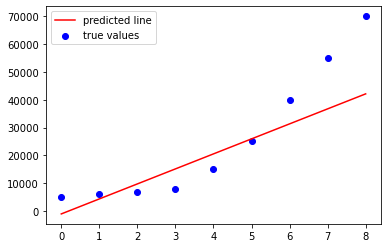

In [60]:
plt.figure()
plt.scatter(df['experience'],df['salary'],c='blue',label='true values')
plt.plot(df['experience'],model.predict(X),c='red',label='predicted line')
plt.legend()
plt.show()

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
poly = PolynomialFeatures()

In [63]:
X_poly_train = poly.fit_transform(X_train)

In [64]:
X_poly_test = poly.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
model.fit(X_poly_train,y_train)

LinearRegression()

In [68]:
print('train score',model.score(X_poly_train,y_train)*100)

train score 98.77079828005235


In [69]:
print('test score',model.score(X_poly_test,y_test)*100)

test score 86.75736961451238


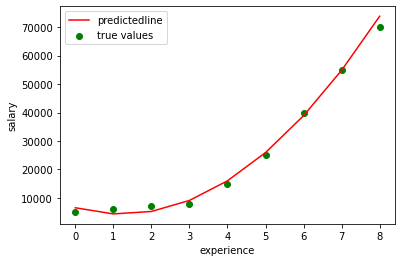

In [70]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['experience'],df['salary'],c='green',label='true values')
plt.plot(df['experience'],model.predict(poly.transform(X)),c='red',label='predictedline')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()
plt.show()